# Predicting default payment for credit card clients

# Introduction

Credit default can be defined as the failure to repay a debt including interest or principal on a loan or security on the due date. This can cause losses for lenders so that preventive measures is a must, in which early detection for potential default can be one of those. 
>
The objective of this project is to build a ML model to predit whether the client will default the payment in the coming month.

Data Source: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [2]:
#import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from scipy.stats import mode


In [3]:
df = pd.read_csv('UCI_Credit_Card.csv', sep=',', index_col='ID') 
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Cleaning

## Attribute Definations

| Attribute | Defination | Values |
| --- | --- | --- |
| `ID` | ID of each client | Numeric |
|`LIMIT_BAL` | Amount of given credit in NT dollars (includes individual and family/supplementary credit) | Numeric in NT dollars |
| `SEX` | Gender | `1`: Male, `2`: Female |
| `EDUCATION` | Education level of the client | `1`: High School, `2`: University, `3`: Graduate School, `4`:Others, `5`: Unknown, `6`: Unknown |
| `MARRIAGE` | Marital status | `1`: Married, `2`: Single, `3`: Others |
| `AGE` | Age of the clients | Numeric in years |
| `PAY_0` | Repayment status in September, 2005 | `-1`: pay duly, `1`: payment delay for one month, `2`: payment delay for two months, … `8`: payment delay for eight months, `9`: payment delay for nine months and above |
|`PAY_2`| Repayment status in August, 2005 | Same scale as above |
|`PAY_3`| Repayment status in July, 2005 | Same scale as above |
|`PAY_4`| Repayment status in June, 2005 | Same scale as above |
|`PAY_5`| Repayment status in May, 2005 | Same scale as above |
|`PAY_6`| Repayment status in April, 2005 | Same scale as above |
| `BILL_AMT1` | Amount of bill statement in September, 2005 | Numeric in NT dollars |
| `BILL_AMT2` | Amount of bill statement in August, 2005 | Numeric in NT dollars |
| `BILL_AMT3` | Amount of bill statement in July, 2005 | Numeric in NT dollars |
| `BILL_AMT4` | Amount of bill statement in June, 2005 | Numeric in NT dollars |
| `BILL_AMT5` | Amount of bill statement in May, 2005 | Numeric in NT dollars |
| `BILL_AMT6` | Amount of bill statement in April, 2005 | Numeric in NT dollars |
| `PAY_AMT1` | Amount of previous payment in September, 2005 | Numeric in NT dollars |
| `PAY_AMT2` | Amount of previous payment in August, 2005 | Numeric in NT dollars |
| `PAY_AMT3` | Amount of previous payment in July, 2005 | Numeric in NT dollars |
| `PAY_AMT4` | Amount of previous payment in June, 2005 | Numeric in NT dollars |
| `PAY_AMT5` | Amount of previous payment in May, 2005 | Numeric in NT dollars |
| `PAY_AMT6` | Amount of previous payment in April, 2005 | Numeric in NT dollars |
| `default.payment.next.month` | Default payment | `1`: Yes, `0`: No |

In [4]:
#Raw data overview
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [6]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**No Missing value**

## 1. SEX

In [7]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

- replace the number value with text (easier for analysis) 

In [8]:
df.SEX.replace({1:"Male", 2:"Female"},inplace=True)

In [9]:
df.SEX.head(10)

ID
1     Female
2     Female
3     Female
4     Female
5       Male
6       Male
7       Male
8     Female
9     Female
10      Male
Name: SEX, dtype: object

## 2. AGE

In [10]:
df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

- `AGE` varied from 21 to 79. Median 34.

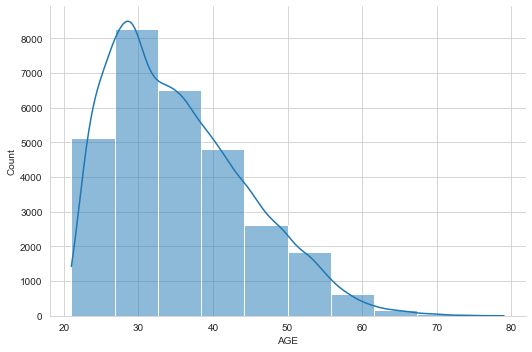

In [11]:
# check value distribution
#df.AGE.hist(bins=10, figsize=(10,5))
sns.displot(df.AGE, kde = True, bins=10, height=5, aspect=1.5)

- `AGE` values are not normally distributed

In [12]:
# Create following bins for different age groups

AGE_bins = [20,30,40,50,60,80]
AGE_bin_labels = ['20-29','30-39','40-49','50-59','>60']

# create a new attribute for age group

df['AGE_GROUP'] = pd.cut(df.AGE, AGE_bins, right=False, labels= AGE_bin_labels)

In [13]:
df.AGE_GROUP.value_counts().sort_index()

20-29     9618
30-39    11238
40-49     6464
50-59     2341
>60        339
Name: AGE_GROUP, dtype: int64

In [14]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AGE_GROUP
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,Female,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20-29
2,120000.0,Female,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20-29
3,90000.0,Female,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-39
4,50000.0,Female,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30-39
5,50000.0,Male,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50-59


## 3. EDUCATION

In [15]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

- `EDUCATION` = 0,4,5,6 are unknown/undefined.
- 468 records with value 0,4,5,6 (2% of the total records)
- Use the mode in different Age groups to replace the unknown/undefined values.


In [16]:
df.loc[df['EDUCATION'].isin([0,4,5,6]),['EDUCATION']]=np.nan
df.loc[df.EDUCATION.isnull(),'EDUCATION']=(df.groupby('AGE_GROUP')['EDUCATION'].\
                                               transform(lambda x: mode(x)[0][0]))
df.EDUCATION.replace({1:"Graduate School", 2:"University", 3:"High School"},inplace=True)
#df.EDUCATION.replace({1:"Graduate School", 2:"University", 3:"High School", 4:"Unknown", 5:"Unknown", 6:"Unknown", 0:"Unknown"},inplace=True)

In [17]:
df.EDUCATION.value_counts()

University         14453
Graduate School    10585
High School         4962
Name: EDUCATION, dtype: int64

## 4. MARRIAGE

In [18]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

- We will consider `MARRIAGE`value 0 and 3 as "Others"

In [19]:
df.MARRIAGE.replace({1:"Married", 2:"Single", 3:"Others", 0:"Others"},inplace=True)

In [20]:
df.MARRIAGE.value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

## 5. LIMIT_BAL





In [21]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

- `LIMIT_BAL` (credit limit) varied from 10,000 to 1,000,000 NTD

- 1k NTD ~= 44 CND

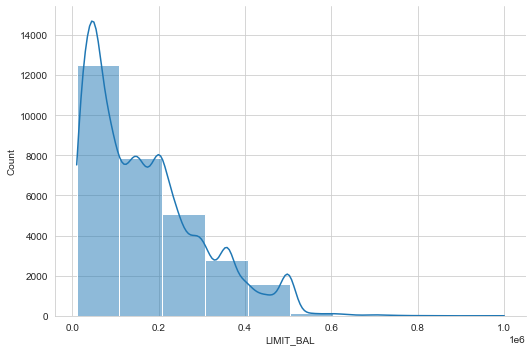

In [22]:
# check value distribution
# df.LIMIT_BAL.hist(bins=10, figsize=(10,5))
sns.displot(df.LIMIT_BAL, kde = True, bins=10, height=5, aspect=1.5)

In [23]:
df.LIMIT_BAL.unique()

array([  20000.,  120000.,   90000.,   50000.,  500000.,  100000.,
        140000.,  200000.,  260000.,  630000.,   70000.,  250000.,
        320000.,  360000.,  180000.,  130000.,  450000.,   60000.,
        230000.,  160000.,  280000.,   10000.,   40000.,  210000.,
        150000.,  380000.,  310000.,  400000.,   80000.,  290000.,
        340000.,  300000.,   30000.,  240000.,  470000.,  480000.,
        350000.,  330000.,  110000.,  420000.,  170000.,  370000.,
        270000.,  220000.,  190000.,  510000.,  460000.,  440000.,
        410000.,  490000.,  390000.,  580000.,  600000.,  620000.,
        610000.,  700000.,  670000.,  680000.,  430000.,  550000.,
        540000., 1000000.,  530000.,  710000.,  560000.,  520000.,
        750000.,  640000.,   16000.,  570000.,  590000.,  660000.,
        720000.,  327680.,  740000.,  800000.,  760000.,  690000.,
        650000.,  780000.,  730000.])

In [24]:
# Create following bins for different credit limit groups

LIMIT_bins = [10000,20000,50000,100000,300000,500000,1000001]
LIMIT_bin_labels = ['<20k','20k-50k','50k-100k','100k-300k','300k-500k','>=500k']

# create a new attribute for age group

df['LIMIT_GROUP'] = pd.cut(df.LIMIT_BAL, LIMIT_bins, right=False, labels= LIMIT_bin_labels)

In [25]:
df.LIMIT_GROUP.value_counts().sort_index()

<20k           495
20k-50k       3816
50k-100k      7139
100k-300k    13433
300k-500k     4189
>=500k         928
Name: LIMIT_GROUP, dtype: int64

## 6. PAY_0(1) - PAY_6 

In [26]:
# Rename "PAY_0" column as "PAY_1"

df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [27]:
PAY_COUNT1 = df.PAY_1.value_counts()
PAY_COUNT2 = df.PAY_2.value_counts()
PAY_COUNT3 = df.PAY_3.value_counts()
PAY_COUNT4 = df.PAY_4.value_counts()
PAY_COUNT5 = df.PAY_5.value_counts()
PAY_COUNT6 = df.PAY_6.value_counts()

print(PAY_COUNT1)
print("------")
print(PAY_COUNT2)
print("------")
print(PAY_COUNT3)
print("------")
print(PAY_COUNT4)
print("------")
print(PAY_COUNT5)
print("------")
print(PAY_COUNT6)

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
------
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
------
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
------
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
------
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
------
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


- All the `PAY_X` attributes has value 0 and -2 which is not defined 

*   From the definations, assumption can be made that the bigger the number, the longer the payments got delayed. "-2" can be assumed to mean pay fully or overpaid and "0" can be assumed to mean late payment within one month.

*   In this analysis, we can consider "-2","-1" and "0" as one group (value = -1), which indicate the client pay the credit balanced duely on that month.


In [28]:
df.PAY_1.replace({0:-1, -2:-1},inplace=True)
df.PAY_2.replace({0:-1, -2:-1},inplace=True)
df.PAY_3.replace({0:-1, -2:-1},inplace=True)
df.PAY_4.replace({0:-1, -2:-1},inplace=True)
df.PAY_5.replace({0:-1, -2:-1},inplace=True)
df.PAY_6.replace({0:-1, -2:-1},inplace=True)

In [29]:
PAY_COUNT1 = df.PAY_1.value_counts().sort_index()
PAY_COUNT2 = df.PAY_2.value_counts().sort_index()
PAY_COUNT3 = df.PAY_3.value_counts().sort_index()
PAY_COUNT4 = df.PAY_4.value_counts().sort_index()
PAY_COUNT5 = df.PAY_5.value_counts().sort_index()
PAY_COUNT6 = df.PAY_6.value_counts().sort_index()

print(PAY_COUNT1)
print("------")
print(PAY_COUNT2)
print("------")
print(PAY_COUNT3)
print("------")
print(PAY_COUNT4)
print("------")
print(PAY_COUNT5)
print("------")
print(PAY_COUNT6)

-1    23182
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_1, dtype: int64
------
-1    25562
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: PAY_2, dtype: int64
------
-1    25787
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: PAY_3, dtype: int64
------
-1    26490
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: PAY_4, dtype: int64
------
-1    27032
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: PAY_5, dtype: int64
------
-1    26921
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8        2
Name: PAY_6, dtype: int64


Create new column
- `TOTAL_LATE_PAYMENT` : Total times of late payment within 6 months (`PAY_1-6` >0 )

- `TOTAL_MONTH_LATE` : Total months of late payment within 6 months

In [30]:
df.loc[:,"TOTAL_LATE_PAYMENT"]=df.loc[:,"PAY_1":"PAY_6"].applymap(lambda x: int(x>0)).sum(axis=1)

In [31]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AGE_GROUP,LIMIT_GROUP,TOTAL_LATE_PAYMENT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,Female,University,Married,24,2,2,-1,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,20-29,20k-50k,2
2,120000.0,Female,University,Single,26,-1,2,-1,-1,-1,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20-29,100k-300k,2
3,90000.0,Female,University,Single,34,-1,-1,-1,-1,-1,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-39,50k-100k,0
4,50000.0,Female,University,Married,37,-1,-1,-1,-1,-1,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30-39,50k-100k,0
5,50000.0,Male,University,Married,57,-1,-1,-1,-1,-1,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50-59,50k-100k,0


## 7. BILL_AMT1 - BILL_AMT6
Create new column
- `RATIO` : Average Credit utilization 


In [32]:
df[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


There are negative bill amounts as there are overpayments made, as the bill amount itself is not really meaningful; 
A series of new attributes will be generated: credit utilization ratio

credit utilization ratio captures the ratio of your outstanding credit card balances to your credit card limits, which is an important factor when predicting the default/credit risk. 

Credit utilization ratio = Bill amount / credit limit 


In [33]:
df.eval(
    '''    
RATIO_1 = (BILL_AMT1 / LIMIT_BAL)*100
RATIO_2 = (BILL_AMT2 / LIMIT_BAL)*100 
RATIO_3 = (BILL_AMT3 / LIMIT_BAL)*100
RATIO_4 = (BILL_AMT4 / LIMIT_BAL)*100
RATIO_5 = (BILL_AMT5 / LIMIT_BAL)*100
RATIO_6 = (BILL_AMT6 / LIMIT_BAL)*100
'''
, inplace = True)

In [34]:
df[["RATIO_1","RATIO_2","RATIO_3","RATIO_4","RATIO_5","RATIO_6"]].describe()

,RATIO_1,RATIO_2,RATIO_3,RATIO_4,RATIO_5,RATIO_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,42.377145,41.112812,39.219232,35.950289,33.310794,31.858495
std,41.146241,40.455475,39.644878,36.868582,35.054205,34.530077
min,-61.989200,-139.554000,-102.510000,-137.450000,-87.674286,-150.953000
25%,2.203167,1.831826,1.603047,1.429853,1.113309,0.780000
50%,31.399386,29.605750,27.313500,24.206627,21.202632,18.522389
75%,82.984318,80.650000,75.510652,66.793722,60.224500,58.216944
max,645.530000,638.050000,1068.857500,514.685000,493.550000,388.555000


In [35]:
cols = ['RATIO_1','RATIO_2','RATIO_3','RATIO_4','RATIO_5','RATIO_6']
df['RATIO'] = df[cols].astype(float).mean(axis=1)

df.drop(columns=['RATIO_1','RATIO_2','RATIO_3','RATIO_4','RATIO_5','RATIO_6'], inplace = True)

In [36]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AGE_GROUP,LIMIT_GROUP,TOTAL_LATE_PAYMENT,RATIO
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,Female,University,Married,24,2,2,-1,-1,-1,...,689.0,0.0,0.0,0.0,0.0,1,20-29,20k-50k,2,6.420000
2,120000.0,Female,University,Single,26,-1,2,-1,-1,-1,...,1000.0,1000.0,1000.0,0.0,2000.0,1,20-29,100k-300k,2,2.371806
3,90000.0,Female,University,Single,34,-1,-1,-1,-1,-1,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-39,50k-100k,0,18.824630
4,50000.0,Female,University,Married,37,-1,-1,-1,-1,-1,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,30-39,50k-100k,0,77.111333
5,50000.0,Male,University,Married,57,-1,-1,-1,-1,-1,...,36681.0,10000.0,9000.0,689.0,679.0,0,50-59,50k-100k,0,36.446333


## 8. PAY_AMT1 - PAY_AMT6


In [37]:
df[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## 9. default.payment.next.month (DEFAULT)

In [38]:
# Rename this column as 'DEFAULT'

df.rename(columns={'default.payment.next.month':'DEFAULT'}, inplace=True)

In [39]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,AGE_GROUP,LIMIT_GROUP,TOTAL_LATE_PAYMENT,RATIO
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,Female,University,Married,24,2,2,-1,-1,-1,...,689.0,0.0,0.0,0.0,0.0,1,20-29,20k-50k,2,6.420000
2,120000.0,Female,University,Single,26,-1,2,-1,-1,-1,...,1000.0,1000.0,1000.0,0.0,2000.0,1,20-29,100k-300k,2,2.371806
3,90000.0,Female,University,Single,34,-1,-1,-1,-1,-1,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-39,50k-100k,0,18.824630
4,50000.0,Female,University,Married,37,-1,-1,-1,-1,-1,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,30-39,50k-100k,0,77.111333
5,50000.0,Male,University,Married,57,-1,-1,-1,-1,-1,...,36681.0,10000.0,9000.0,689.0,679.0,0,50-59,50k-100k,0,36.446333


In [40]:
df.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [41]:
df["DEFAULT"].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DEFAULT, dtype: float64

The average default rate is 22%

## Data Cleaning summary

1. Exam & clean all the attributes
2. Rename `default.payment.next.month` to `DEFAULT`, `PAY_0` to `PAY_1`
3. Convert the numeric values into their definations in string format(`SEX`, `EDUCATION`, `MARRIAGE`)
4. Do segmentation for AGE (`AGE_GROUP`)and LIMIT_BAL (`LIMIT_GROUP`)
5. Create new attributes for further analysis 
 - `TOTAL_LATE_PAYMENT`
>
 -`RATIO_X`



## Attribute Definitions (After Data Cleaning)

| Attribute | Definition | Values |
| --- | --- | --- |
| `ID` | ID of each client | Numeric |
|`LIMIT_BAL` | Amount of given credit in NT dollars (includes individual and family/supplementary credit) | Numeric in NT dollars |
| `SEX` | Gender | Character: Male, Female |
| `EDUCATION` | Education level of the client | Character: High School, University, Graduate School |
| `MARRIAGE` | Marital status | Character:Married, Single, Others |
| `AGE` | Age of the clients | Numeric in years |
| `PAY_1` | Repayment status in September, 2005 | `-1`: pay duly, `1`: payment delay for one month, `2`: payment delay for two months, … `8`: payment delay for eight months, `9`: payment delay for nine months and above |
|`PAY_2`| Repayment status in August, 2005 | Same scale as above |
|`PAY_3`| Repayment status in July, 2005 | Same scale as above |
|`PAY_4`| Repayment status in June, 2005 | Same scale as above |
|`PAY_5`| Repayment status in May, 2005 | Same scale as above |
|`PAY_6`| Repayment status in April, 2005 | Same scale as above |
|`TOTAL_LATE_PAYMENT`| (New)Times of late payment from April to September, 2005 | Numeric |
| `BILL_AMT1` | Amount of bill statement in September, 2005 | Numeric in NT dollars |
| `BILL_AMT2` | Amount of bill statement in August, 2005 | Numeric in NT dollars |
| `BILL_AMT3` | Amount of bill statement in July, 2005 | Numeric in NT dollars |
| `BILL_AMT4` | Amount of bill statement in June, 2005 | Numeric in NT dollars |
| `BILL_AMT5` | Amount of bill statement in May, 2005 | Numeric in NT dollars |
| `BILL_AMT6` | Amount of bill statement in April, 2005 | Numeric in NT dollars |
| `RATIO` | (NEW) Average Credit utilization percentage from April to September, 2005 | Numeric in percentage |
| `PAY_AMT1` | Amount of previous payment in September, 2005 | Numeric in NT dollars |
| `PAY_AMT2` | Amount of previous payment in August, 2005 | Numeric in NT dollars |
| `PAY_AMT3` | Amount of previous payment in July, 2005 | Numeric in NT dollars |
| `PAY_AMT4` | Amount of previous payment in June, 2005 | Numeric in NT dollars |
| `PAY_AMT5` | Amount of previous payment in May, 2005 | Numeric in NT dollars |
| `PAY_AMT6` | Amount of previous payment in April, 2005 | Numeric in NT dollars |
| `Default` | Default payment | `1`: Yes, `0`: No |

# Data Analysis and Visualization

## Correlation

<AxesSubplot:>

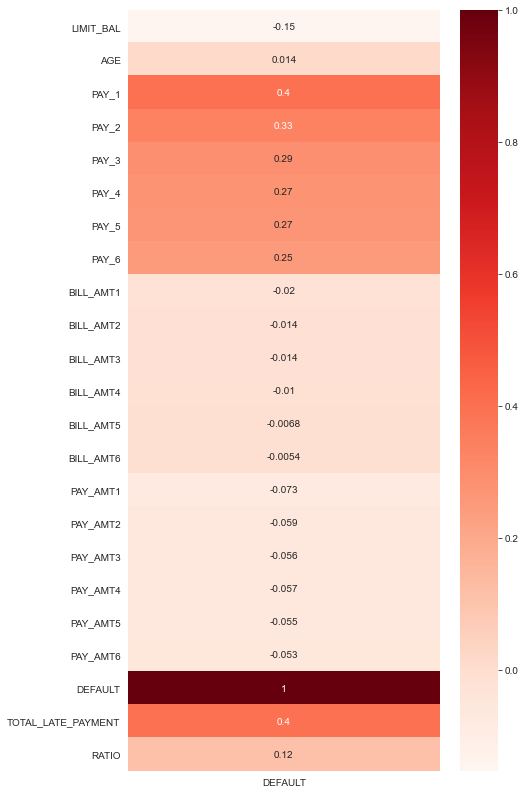

In [42]:
cor1 = df.corr()
plt.figure(figsize=(7,14))
sns.heatmap(cor1[['DEFAULT']],annot=True,cmap=plt.cm.Reds)

In [43]:
#In order to find the relationship for categorical attributes (SEX, EDUCATION,MARRIAGE). We need to change them back to numerical values
df2 = df.loc[: , ['SEX', 'MARRIAGE', 'EDUCATION','DEFAULT']].copy()

df2.head()

,SEX,MARRIAGE,EDUCATION,DEFAULT
ID,,,,
1,Female,Married,University,1
2,Female,Single,University,1
3,Female,Single,University,0
4,Female,Married,University,0
5,Male,Married,University,0


In [44]:
df2.SEX.replace({"Male":1, "Female":2}, inplace=True)
df2.MARRIAGE.replace({"Married":1, "Single":2, "Others":3}, inplace=True)
df2.EDUCATION.replace({"Graduate School":1, "University":2, "High School":3}, inplace=True)
df2.head()

,SEX,MARRIAGE,EDUCATION,DEFAULT
ID,,,,
1,2,1,2,1
2,2,2,2,1
3,2,2,2,0
4,2,1,2,0
5,1,1,2,0


<AxesSubplot:>

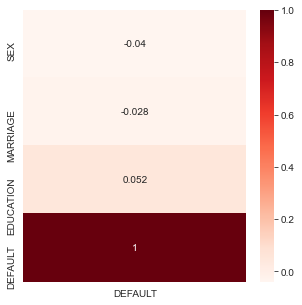

In [45]:
cor2 = df2.corr()
plt.figure(figsize=(5,5))
sns.heatmap(cor2[['DEFAULT']],annot=True,cmap=plt.cm.Reds)

In [46]:
cor = pd.concat([cor1['DEFAULT'],cor2['DEFAULT']], axis = 0)
cor

LIMIT_BAL            -0.153520
AGE                   0.013890
PAY_1                 0.398636
PAY_2                 0.333438
PAY_3                 0.292026
PAY_4                 0.274779
PAY_5                 0.266465
PAY_6                 0.248252
BILL_AMT1            -0.019644
BILL_AMT2            -0.014193
BILL_AMT3            -0.014076
BILL_AMT4            -0.010156
BILL_AMT5            -0.006760
BILL_AMT6            -0.005372
PAY_AMT1             -0.072929
PAY_AMT2             -0.058579
PAY_AMT3             -0.056250
PAY_AMT4             -0.056827
PAY_AMT5             -0.055124
PAY_AMT6             -0.053183
DEFAULT               1.000000
TOTAL_LATE_PAYMENT    0.398394
RATIO                 0.115483
SEX                  -0.039961
MARRIAGE             -0.027575
EDUCATION             0.051858
DEFAULT               1.000000
Name: DEFAULT, dtype: float64

In [47]:
# Find the attribute with high correlation with default
abs(cor).sort_values(ascending = False)

DEFAULT               1.000000
DEFAULT               1.000000
PAY_1                 0.398636
TOTAL_LATE_PAYMENT    0.398394
PAY_2                 0.333438
PAY_3                 0.292026
PAY_4                 0.274779
PAY_5                 0.266465
PAY_6                 0.248252
LIMIT_BAL             0.153520
RATIO                 0.115483
PAY_AMT1              0.072929
PAY_AMT2              0.058579
PAY_AMT4              0.056827
PAY_AMT3              0.056250
PAY_AMT5              0.055124
PAY_AMT6              0.053183
EDUCATION             0.051858
SEX                   0.039961
MARRIAGE              0.027575
BILL_AMT1             0.019644
BILL_AMT2             0.014193
BILL_AMT3             0.014076
AGE                   0.013890
BILL_AMT4             0.010156
BILL_AMT5             0.006760
BILL_AMT6             0.005372
Name: DEFAULT, dtype: float64

From the correlation calculation and heatmap. We can tell the correlation from highest to lowest are:
1. Payment status & total late payment in the past 6 months
2. Credit limit
3. Credit utilization
4. Education
5. Gender
6. Marital status
7. Age
8. Bill Amount

We will discover the relationship for different pair of the attributes in the following sections

## SEX vs. DEFAULT

In [48]:
gender_plot = df.groupby('SEX', as_index=False)['DEFAULT'].mean()
# gender_plot.plot.bar()
gender_plot

,SEX,DEFAULT
0,Female,0.207763
1,Male,0.241672


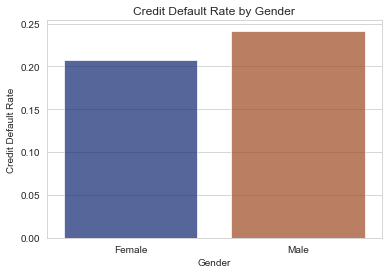

In [49]:
x_axis = 'SEX'
y_axis = 'DEFAULT'
dataset = gender_plot

sns.barplot(x = x_axis, y = y_axis, data = dataset, palette='dark', alpha=.7)

plt.xlabel("Gender")
plt.ylabel("Credit Default Rate")
plt.title("Credit Default Rate by Gender")
None

Male clients have a slightly higher default rate than femals. (24% vs. 20%) 

## MARRIAGE vs. DEFAULT

In [50]:
mry_plot = df.groupby('MARRIAGE', as_index=False)['DEFAULT'].mean()
mry_plot

,MARRIAGE,DEFAULT
0,Married,0.234717
1,Others,0.236074
2,Single,0.209283


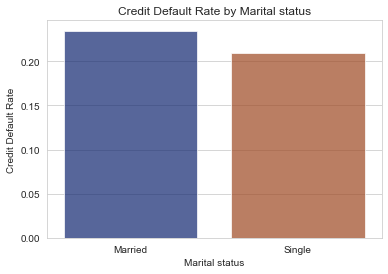

In [51]:
x_axis = 'MARRIAGE'
y_axis = 'DEFAULT'
dataset = mry_plot

sns.barplot(x = x_axis, y = y_axis, data = dataset, order=['Married','Single'], palette='dark', alpha=.7)

plt.xlabel("Marital status")
plt.ylabel("Credit Default Rate")
plt.title("Credit Default Rate by Marital status")
None

24% of married people are defaulted more than singles (21%) are, which makes sense since married people have higher cost of living

## AGE_GROUP vs. DEFAULT

In [52]:
age_plot = df.groupby('AGE_GROUP', as_index=False)['DEFAULT'].mean()
age_plot

,AGE_GROUP,DEFAULT
0,20-29,0.228426
1,30-39,0.202527
2,40-49,0.229734
3,50-59,0.248612
4,>60,0.283186


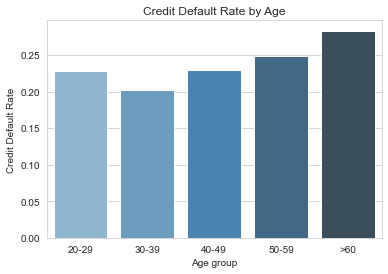

In [53]:
x_axis = 'AGE_GROUP'
y_axis = 'DEFAULT'
dataset = age_plot

sns.barplot(x = x_axis, y = y_axis, data = dataset, palette='Blues_d')

plt.xlabel("Age group")
plt.ylabel("Credit Default Rate")
plt.title("Credit Default Rate by Age")
None

Maximum defaulted age bracket is >60 with 28% and minimum 30-39 with 20% default

## EDUCATION vs. DEFAULT

In [54]:
edu_plot = df.groupby('EDUCATION', as_index=False)['DEFAULT'].mean()
edu_plot

,EDUCATION,DEFAULT
0,Graduate School,0.192348
1,High School,0.250101
2,University,0.232408


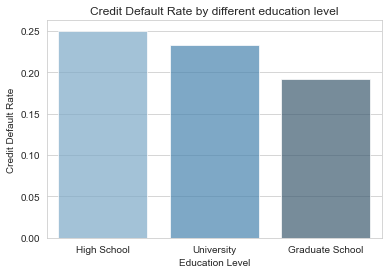

In [55]:
x_axis = 'EDUCATION'
y_axis = 'DEFAULT'
dataset = edu_plot

sns.barplot(x = x_axis, y = y_axis, data = dataset, order=['High School','University','Graduate School'], palette='Blues_d', alpha=.7)

plt.xlabel("Education Level")
plt.ylabel("Credit Default Rate")
plt.title("Credit Default Rate by different education level")
None

Clients with higher education level are less likely to have credit default

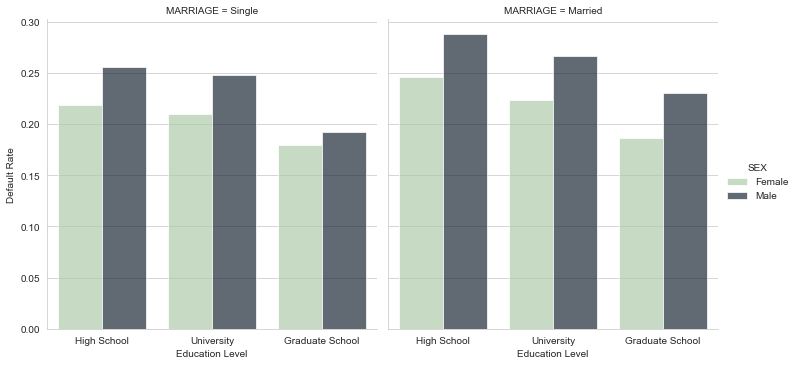

In [56]:
g = sns.catplot( data=df, x="EDUCATION", y="DEFAULT",
            order = ['High School','University','Graduate School'],
            hue="SEX",
            col="MARRIAGE",
            col_order= ['Single','Married'],
            kind="bar",
            ci=None,
            alpha=.7,
            height=5,
            aspect=1, 
            palette="ch:r=-.5,l=.75")

g.set_axis_labels("Education Level","Default Rate")

None

## LIMIT_GROUP vs. DEFAULT

In [57]:
limit_plot = df.groupby('LIMIT_GROUP', as_index=False)['DEFAULT'].mean()
limit_plot

,LIMIT_GROUP,DEFAULT
0,<20k,0.397980
1,20k-50k,0.355870
2,50k-100k,0.260120
3,100k-300k,0.187895
4,300k-500k,0.142277
5,>=500k,0.112069


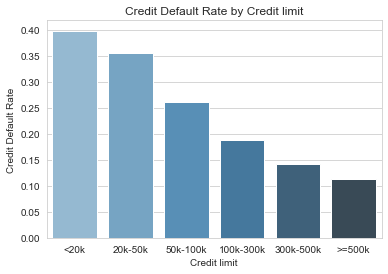

In [58]:
x_axis = 'LIMIT_GROUP'
y_axis = 'DEFAULT'
dataset = limit_plot

sns.barplot(x = x_axis, y = y_axis, data = dataset, palette='Blues_d')

plt.xlabel("Credit limit")
plt.ylabel("Credit Default Rate")
plt.title("Credit Default Rate by Credit limit")
None

Clients with lower credit limit have higher chance to default payments. tHE default rate for clients with <20k limit are almost 4 times higher than clients with more than 500k limit. 


In [59]:
df.groupby('EDUCATION')['LIMIT_BAL'].aggregate(['count', 'min', 'mean', 'max'])

,count,min,mean,max
EDUCATION,,,,
Graduate School,10585,10000.0,212956.069910,1000000.0
High School,4962,10000.0,127232.503023,760000.0
University,14453,10000.0,148001.245416,800000.0


In [60]:
df.groupby(['EDUCATION','LIMIT_GROUP'], as_index = False)['DEFAULT'].mean()

,EDUCATION,LIMIT_GROUP,DEFAULT
0,Graduate School,<20k,0.320000
1,Graduate School,20k-50k,0.330042
2,Graduate School,50k-100k,0.238538
3,Graduate School,100k-300k,0.185811
4,Graduate School,300k-500k,0.144556
5,Graduate School,>=500k,0.117857
6,High School,<20k,0.407692
7,High School,20k-50k,0.375940
8,High School,50k-100k,0.267045
9,High School,100k-300k,0.183775


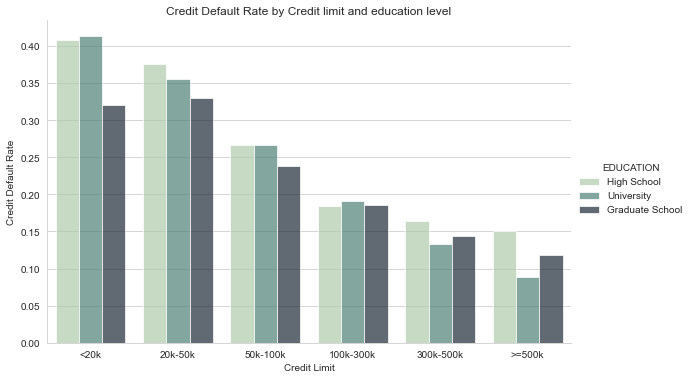

In [61]:
sns.catplot(x= 'LIMIT_GROUP', y='DEFAULT', hue='EDUCATION', data=df,
                kind="bar",
                hue_order=['High School','University','Graduate School'],
                ci=None,
                height=5,
                aspect=1.6,
                palette='ch:r=-.5,l=.75',
                alpha = 0.7);

plt.xlabel("Credit Limit")
plt.ylabel("Credit Default Rate")
plt.title("Credit Default Rate by Credit limit and education level")
None

Clients with higher education level have more credit limit on average and they are less likely to default.

## RATIO vs. DEFAULT

In [62]:
df[["DEFAULT","RATIO"]].groupby("DEFAULT").mean()

,RATIO
DEFAULT,
0,35.139103
1,44.929754


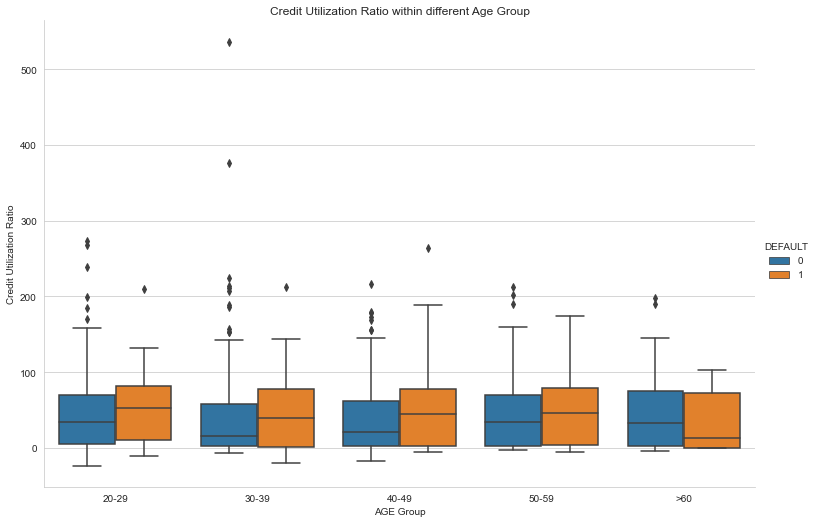

In [63]:
sns.catplot(data=df, x="AGE_GROUP", y='RATIO', hue ='DEFAULT', kind='box',
                        height = 7,
                        aspect = 1.5)
plt.xlabel("AGE Group")
plt.ylabel("Credit Utilization Ratio")
plt.title("Credit Utilization Ratio within different Age Group")
None

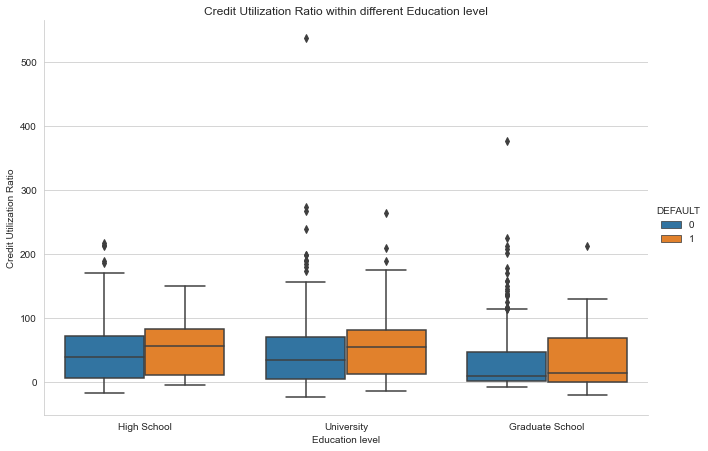

In [64]:
sns.catplot(data=df, x="EDUCATION", y='RATIO', hue = 'DEFAULT', kind='box',
                        height = 6,
                        aspect = 1.5,
                        order=['High School','University','Graduate School'])

plt.xlabel("Education level")
plt.ylabel("Credit Utilization Ratio")
plt.title("Credit Utilization Ratio within different Education level")
None

## LATE PAYMENT vs.DEFAULT

In [65]:
latepay_plot = df.groupby('TOTAL_LATE_PAYMENT', as_index=False)['DEFAULT'].mean()
latepay_plot

,TOTAL_LATE_PAYMENT,DEFAULT
0,0,0.117104
1,1,0.298238
2,2,0.387572
3,3,0.508666
4,4,0.573081
5,5,0.573826
6,6,0.703207


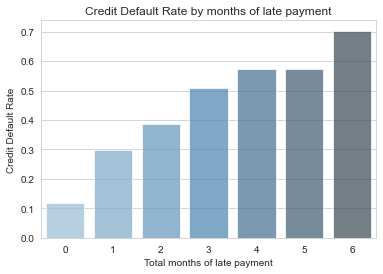

In [66]:
x_axis = 'TOTAL_LATE_PAYMENT'
y_axis = 'DEFAULT'
dataset = latepay_plot

sns.barplot(x = x_axis, y = y_axis, data = dataset, palette='Blues_d', alpha=.7)

plt.xlabel("Total months of late payment")
plt.ylabel("Credit Default Rate")
plt.title("Credit Default Rate by months of late payment")
None

Generally, the late payment occurs more often, more likely to default; payment delayed for longer time, more likely to default

In [67]:
df.groupby(['MARRIAGE','TOTAL_LATE_PAYMENT'], as_index = False)['DEFAULT'].mean()

,MARRIAGE,TOTAL_LATE_PAYMENT,DEFAULT
0,Married,0,0.126888
1,Married,1,0.310933
2,Married,2,0.412043
3,Married,3,0.504762
4,Married,4,0.602326
5,Married,5,0.655405
6,Married,6,0.722050
7,Others,0,0.141667
8,Others,1,0.274194
9,Others,2,0.343750


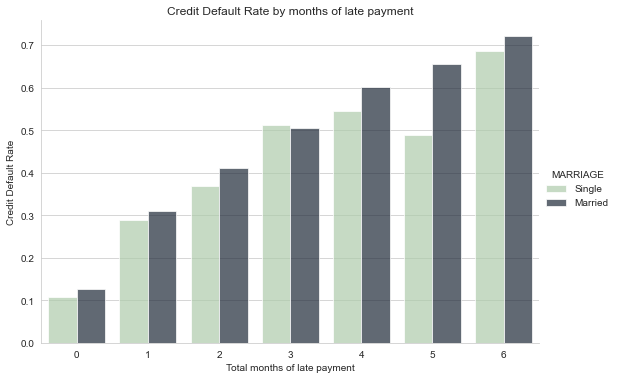

In [68]:
sns.catplot(x= 'TOTAL_LATE_PAYMENT', y='DEFAULT', hue='MARRIAGE', data=df,
                kind="bar",
                hue_order=['Single','Married'],
                ci=None,
                height=5,
                aspect=1.5,
                palette='ch:r=-.5,l=.75',
                alpha = 0.7);

plt.xlabel("Total months of late payment")
plt.ylabel("Credit Default Rate")
plt.title("Credit Default Rate by months of late payment")
None

C:\Users\Khurram\miniconda3\envs\uw\lib\site-packages\seaborn\categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


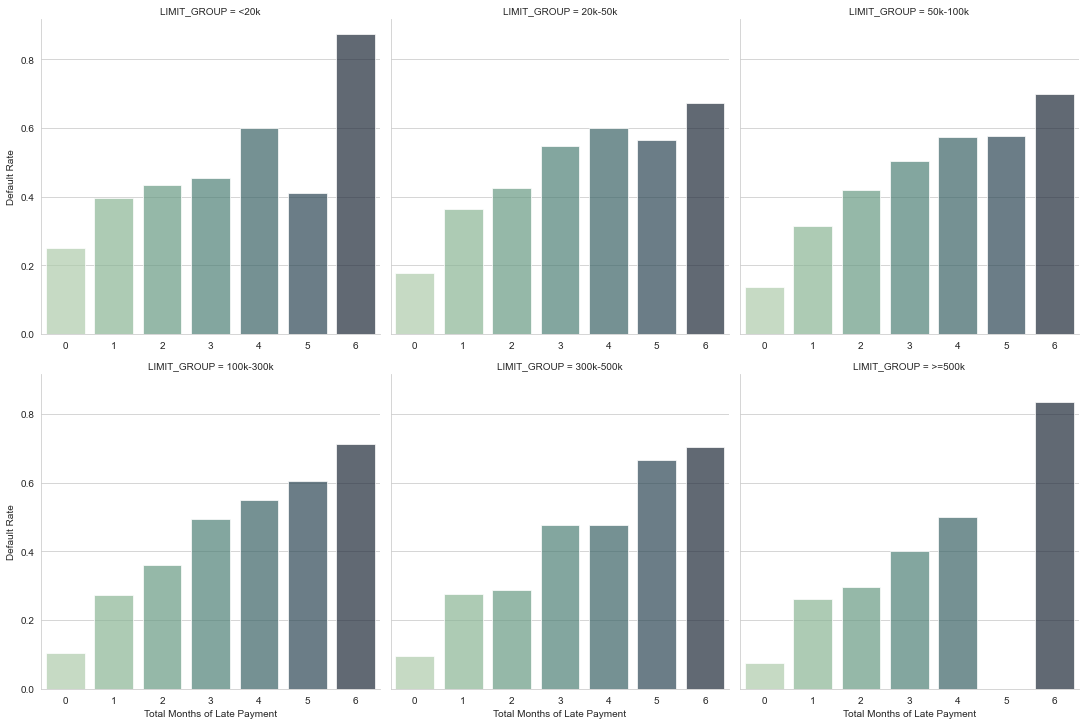

In [69]:
g = sns.catplot(data=df, x= 'TOTAL_LATE_PAYMENT', y='DEFAULT',
            col='LIMIT_GROUP',
            col_wrap = 3,
            kind="bar",
            ci=None,
            height=5,
            sharex = False,
            palette='ch:r=-.5,l=.75',
            alpha = 0.7)

g.set_axis_labels("Total Months of Late Payment","Default Rate")
# g.set_titles("Default Rate by different Times of Late Payment and Credit Limit")

None

# Predictive Modeling

## Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Dummy variables for Sex
sex_dummies = pd.get_dummies(df["SEX"])
sex_dummies.rename(columns={"Male": 0, "Female": 1})
sex_dummies.head(5)

,Female,Male
ID,,
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1


In [72]:
# Dummy variables for education
education_dummies = pd.get_dummies(df["EDUCATION"])
education_dummies.rename(columns={"High School":0, "University":1, "Graduate School":2})
education_dummies.head(5)

,Graduate School,High School,University
ID,,,
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1


In [73]:
# Dummy variables for marriage
marriage_dummies = pd.get_dummies(df["MARRIAGE"])
marriage_dummies.rename(columns={"Single":0, "Married":1})
marriage_dummies.head(5)

,Married,Others,Single
ID,,,
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0
5,1,0,0


In [74]:
df3=pd.concat([df, sex_dummies, education_dummies, marriage_dummies], axis=1)
df3.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,TOTAL_LATE_PAYMENT,RATIO,Female,Male,Graduate School,High School,University,Married,Others,Single
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,Female,University,Married,24,2,2,-1,-1,-1,...,2,6.420000,1,0,0,0,1,1,0,0
2,120000.0,Female,University,Single,26,-1,2,-1,-1,-1,...,2,2.371806,1,0,0,0,1,0,0,1
3,90000.0,Female,University,Single,34,-1,-1,-1,-1,-1,...,0,18.824630,1,0,0,0,1,0,0,1
4,50000.0,Female,University,Married,37,-1,-1,-1,-1,-1,...,0,77.111333,1,0,0,0,1,1,0,0
5,50000.0,Male,University,Married,57,-1,-1,-1,-1,-1,...,0,36.446333,0,1,0,0,1,1,0,0


In [75]:
print(df.columns.to_list())

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'AGE_GROUP', 'LIMIT_GROUP', 'TOTAL_LATE_PAYMENT', 'RATIO']


Based on the correlation heatmap, BILL_AMT1-6 have low correlation with the default. So we remove them from the input features for our models.

In [76]:
X = df3.drop(['DEFAULT','AGE_GROUP','LIMIT_GROUP','SEX','EDUCATION','MARRIAGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis=1)
y =df3["DEFAULT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 24)
(6000, 24)
(24000,)
(6000,)


## Ramdon Forest

### Training

In [77]:
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_features='sqrt')
rf_clf.fit(X_train, y_train) #train the model on the training set

RandomForestClassifier(max_features='sqrt', n_estimators=200, n_jobs=-1)

### Testing

In [78]:
y_pred = rf_clf.predict(X_test) #make predictions for the test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(6000,)


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [79]:
#compare y_pred to our actual y_test
(y_pred == y_test).sum()

4920

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.82


In [81]:
y_test.value_counts()

0    4686
1    1314
Name: DEFAULT, dtype: int64

In [82]:
y_test.value_counts()[0]/y_test.value_counts().sum()

0.781

In [83]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random Forest', acc, prec ,rec, f1, roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.82,0.639952,0.407154,0.497674,0.67146


### Confusion Matrix

C:\Users\Khurram\miniconda3\envs\uw\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2000x1500 with 0 Axes>

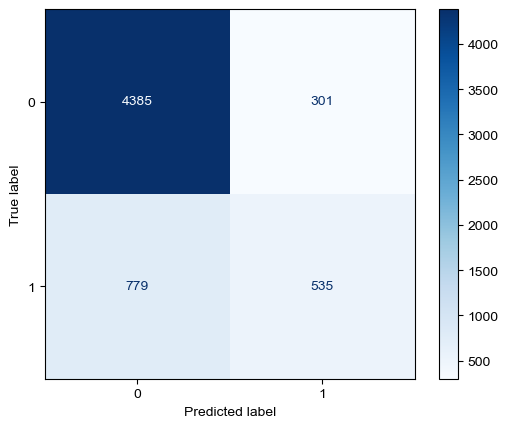

In [84]:
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(rf_clf, X_test, y_test, values_format="", cmap="Blues")

### Feature importance

In [85]:
df_imp = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp

,Feature Importance
RATIO,0.106878
AGE,0.089803
LIMIT_BAL,0.080497
PAY_1,0.080377
PAY_AMT1,0.076831
PAY_AMT2,0.072253
PAY_AMT3,0.070361
PAY_AMT6,0.068728
PAY_AMT4,0.067301
PAY_AMT5,0.067000


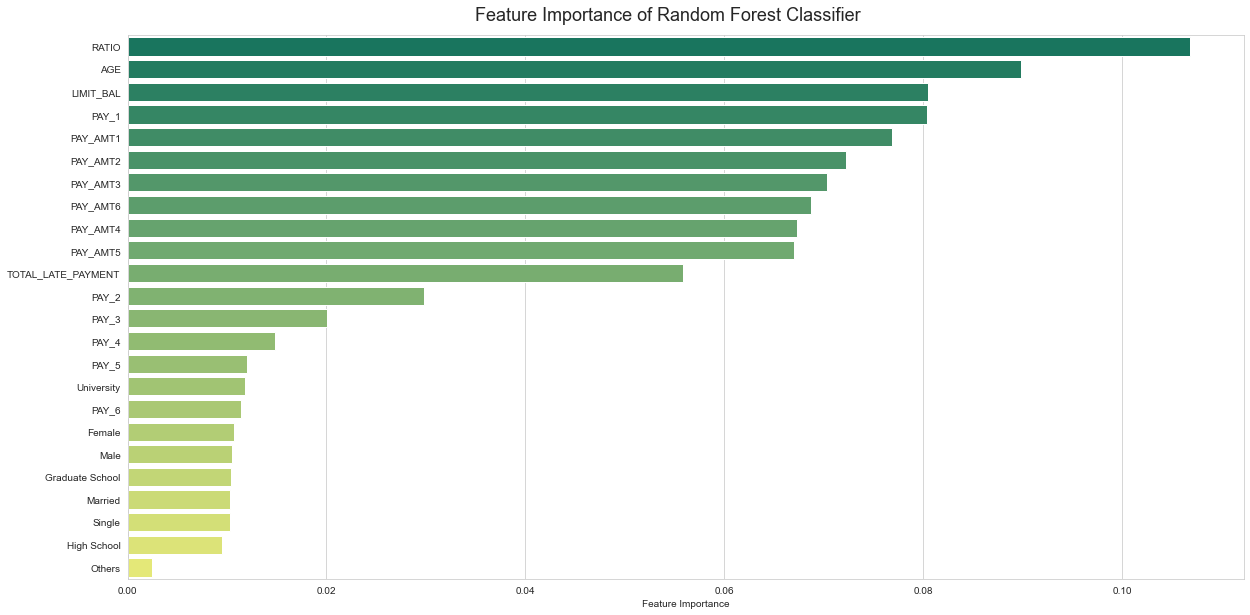

In [86]:
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x="Feature Importance", y=df_imp.index, data=df_imp, palette="summer")
fig.suptitle("Feature Importance of Random Forest Classifier", y=0.92, fontsize=18);

## KNN

In [87]:
display(X_train.describe())
print()
display(X_test.describe())

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,...,TOTAL_LATE_PAYMENT,RATIO,Female,Male,Graduate School,High School,University,Married,Others,Single
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,168106.403333,35.489667,-0.418250,-0.536750,-0.556167,-0.627708,-0.684083,-0.679292,5636.507958,5.897166e+03,...,0.827125,37.235252,0.603458,0.396542,0.353375,0.164500,0.482125,0.456958,0.012708,0.530333
std,129934.936454,9.204881,1.141434,1.140447,1.123787,1.062930,0.993976,0.992209,15906.836618,2.308699e+04,...,1.540375,35.244358,0.489189,0.489189,0.478028,0.370736,0.499691,0.498154,0.112015,0.499089
min,10000.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000e+00,...,0.000000,-23.259000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1000.000000,8.130000e+02,...,0.000000,2.971458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2108.000000,2.006000e+03,...,0.000000,28.345606,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,240000.000000,41.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5011.000000,5.000000e+03,...,1.000000,68.632515,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1000000.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,505000.000000,1.684259e+06,...,6.000000,536.430833,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,...,TOTAL_LATE_PAYMENT,RATIO,Female,Male,Graduate School,High School,University,Married,Others,Single
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,...,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,164996.000000,35.468833,-0.406833,-0.513167,-0.552833,-0.610333,-0.661500,-0.636833,5771.870667,6.017153e+03,...,0.86250,37.582964,0.604833,0.395167,0.350667,0.169000,0.480333,0.448667,0.012000,0.539333
std,128976.619892,9.270564,1.147260,1.169781,1.136262,1.085675,1.032035,1.055365,18964.261263,2.285713e+04,...,1.60863,34.968201,0.488927,0.488927,0.477219,0.374783,0.499655,0.497399,0.108894,0.498492
min,10000.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000e+00,...,0.00000,-16.568750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,996.750000,9.895000e+02,...,0.00000,3.135536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2095.500000,2.040000e+03,...,0.00000,28.931417,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,230000.000000,42.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5000.000000,5.000000e+03,...,1.00000,69.691116,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,800000.000000,73.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,873552.000000,1.215471e+06,...,6.00000,198.733333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.7298059405940596


### Training

In [89]:
# Number of neighbours to be tested
k = np.arange(start=1, stop=50, step=3)
k

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])

### Testing

In [90]:
from sklearn.neighbors import KNeighborsClassifier
scores = [None]*len(k)
for i in np.arange(len(k)):
    print(f"Number of Neighbours = {k[i]}")
    knn = KNeighborsClassifier(n_neighbors=k[i])
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores[i] = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score = {scores[i]}")
    print("\n")

Number of Neighbours = 1
Accuracy Score = 0.7293333333333333


Number of Neighbours = 4
Accuracy Score = 0.7971666666666667


Number of Neighbours = 7
Accuracy Score = 0.8025


Number of Neighbours = 10
Accuracy Score = 0.8086666666666666


Number of Neighbours = 13
Accuracy Score = 0.81


Number of Neighbours = 16
Accuracy Score = 0.8105


Number of Neighbours = 19
Accuracy Score = 0.8088333333333333


Number of Neighbours = 22
Accuracy Score = 0.8116666666666666


Number of Neighbours = 25
Accuracy Score = 0.812


Number of Neighbours = 28
Accuracy Score = 0.8121666666666667


Number of Neighbours = 31
Accuracy Score = 0.8105


Number of Neighbours = 34
Accuracy Score = 0.8106666666666666


Number of Neighbours = 37
Accuracy Score = 0.8085


Number of Neighbours = 40
Accuracy Score = 0.8076666666666666


Number of Neighbours = 43
Accuracy Score = 0.8066666666666666


Number of Neighbours = 46
Accuracy Score = 0.8078333333333333


Number of Neighbours = 49
Accuracy Score = 0.8075




Text(0, 0.5, 'Average Accuracy Score')

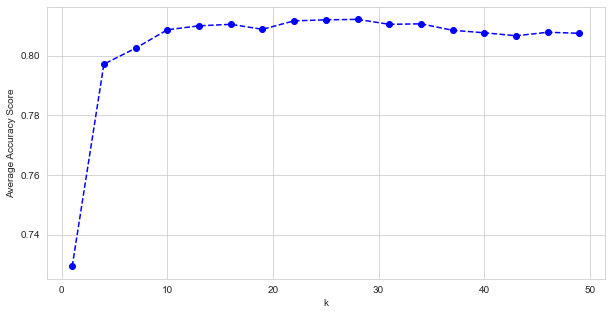

In [91]:
plot_x = k
plot_y = scores
plt.figure(figsize=(10,5))
plt.plot(plot_x, plot_y, 'bo--')
plt.xlabel("k")
plt.ylabel("Average Accuracy Score")

In [92]:
highest_acc = np.amax(a=scores)
max_ind = np.argmax(a=scores)
print(f"The best model has an accuracy of {highest_acc} and uses {k[max_ind]} neigbours.")

The best model has an accuracy of 0.8121666666666667 and uses 28 neigbours.


In [93]:
knn = KNeighborsClassifier(n_neighbors=k[max_ind])
knn.fit(X_train_scaled, y_train)

roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['KNN', acc, prec ,rec, f1, roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.8075,0.617084,0.318874,0.420472,0.631695


### Confusion Matrix

C:\Users\Khurram\miniconda3\envs\uw\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2000x1500 with 0 Axes>

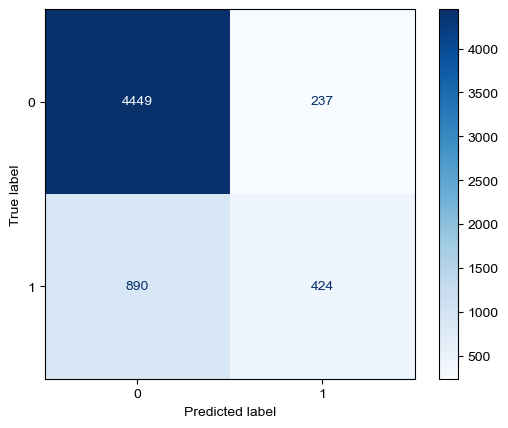

In [94]:
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn, X_test_scaled, y_test, values_format="", cmap="Blues")

# Conclusion

Ramdon forest classifier can give us ~81% accuracy on whether a customer is likely to default next month.

KNN classifier has a slightly lower accuracy score at ~80% in this case. 

The strongest predictors of default are the `PAY_X` or `TOTAL_LATE_PAY`), `LIMIT_BAL`,  `PAY_AMTX` (amount paid in previous months).